# Installation
The maser software library is described [here](https://maser.lesia.obspm.fr/task-4-software-library/).     
Installation can be done using pip : [documentation here](https://maser.readthedocs.io/en/latest/sections/1-install.html).    
Some examples on how to use the package are available [here](https://gitlab.obspm.fr/maser/maser4py/-/blob/fix_install/docs/source/sections/tutorial.rst?ref_type=heads).

This notebook uses the maser4py package to open (and maybe display) radio measurements from RPW. Eventually maser could also be used to find and download data but at this point, I dowloaded the data "by hand" (see below). Another way to download RPW data is to use the SOAR, which can be done by using the SunPy package (but I did not try yet).

# Data
I usually get plots and data from the [RPW website](https://rpw.lesia.obspm.fr/).
### Summary plots
Summary plots are available [here](https://rpw.lesia.obspm.fr/rpw-data/daily-summary-plots/). I usually look at the plot 'rpw-thr-surv'.
### Data
For radio spectrogram, you want to download files called e.g. `solo_L2_rpw-tnr-surv_20210522_V05.cdf` for the TNR receiver, and `solo_L2_rpw-hfr-surv_20210522_V03.cdf` for the HFR receiver. These two have different but overlapping frequency coverage. They can be downloaded from [here](https://rpw.lesia.obspm.fr/roc/data/pub/solo/rpw/data/L2/thr/2021/05/)

# Opening and plotting radio spectra

In [1]:
from maser.data import Data
from matplotlib import pyplot as plt
import numpy as np

## TNR data

In [2]:
file = '..\\..\\Downloads\\solo_L2_rpw-tnr-surv_20210522_V05.cdf'
tnr_data = Data(file).as_xarray()

In [3]:
tnr_data

<xarray.Dataset>
Dimensions:                     (frequency: 128, time: 6630)
Coordinates:
  * frequency                   (frequency) float64 3.992e+03 ... 9.786e+05
  * time                        (time) datetime64[ns] 2021-05-22T00:01:05.633...
Data variables: (12/15)
    VOLTAGE_SPECTRAL_POWER_CH1  (frequency, time) float64 1.653e-13 ... 6.195...
    VOLTAGE_SPECTRAL_POWER_CH2  (frequency, time) float64 -1e+31 ... 8.312e-16
    SENSOR_CH1                  (frequency, time) <U8 'V2-V3' 'V1' ... 'V1' 'V2'
    SENSOR_CH2                  (frequency, time) <U8 'HF_V2-V3' ... 'V3-V1'
    V1                          (frequency, time) float64 nan 9.333e-13 ... nan
    V2                          (frequency, time) float64 nan nan ... 6.195e-15
    ...                          ...
    V3-V1                       (frequency, time) float64 nan nan ... 8.312e-16
    B_MF                        (frequency, time) float64 nan nan ... nan nan
    HF_V1-V2                    (frequency, time) float64 nan nan ... nan nan
    HF_V2-V3                    (frequency, time) float64 -1e+31 nan ... nan nan
    HF_V3-V1                    (frequency, time) float64 nan nan ... nan nan
    DELTA_TIMES                 (frequency, time) float64 0.0 0.0 ... 0.0001005

In [4]:
tnr_power = tnr_data["VOLTAGE_SPECTRAL_POWER_CH1"]
tnr_power.values = 10 * np.log10(tnr_power.values)

In [5]:
tnr_power

<xarray.DataArray 'VOLTAGE_SPECTRAL_POWER_CH1' (frequency: 128, time: 6630)>
array([[-127.81844062, -120.29981195, -121.36814044, ..., -127.4321466 ,
        -119.74244998, -121.09730278],
       [-126.76111809, -122.43990649, -123.5435571 , ..., -126.99303472,
        -122.98876714, -122.12360695],
       [-128.97228782, -126.04630563, -125.35086482, ..., -129.46446805,
        -125.3643995 , -126.78170496],
       ...,
       [-152.24264085, -137.68193448, -135.71186563, ..., -152.93262748,
        -137.27803814, -135.86587402],
       [-146.04932969, -139.49808158, -138.96230437, ..., -145.48687074,
        -139.33369586, -137.59733927],
       [-146.19372807, -142.61798426, -142.16598215, ..., -146.00058221,
        -142.02119214, -142.07954884]])
Coordinates:
  * frequency  (frequency) float64 3.992e+03 4.169e+03 ... 9.371e+05 9.786e+05
  * time       (time) datetime64[ns] 2021-05-22T00:01:05.633967 ... 2021-05-2...
Attributes:
    units:    V^2/Hz

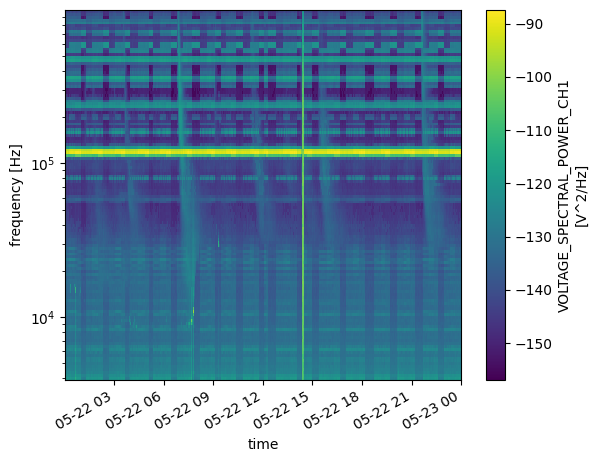

In [6]:
tnr_power.plot(yscale="log")

## HRF data

In [7]:
file = '..\\..\\Downloads\\solo_L2_rpw-hfr-surv_20210522_V03.cdf'
hfr_data = Data(file).as_xarray()

In [8]:
hfr_data

<xarray.Dataset>
Dimensions:                     (frequency: 192, time: 1657)
Coordinates:
  * frequency                   (frequency) float64 375.0 425.0 ... 1.632e+04
  * time                        (time) datetime64[ns] 2021-05-21T23:51:09.713...
Data variables: (12/17)
    VOLTAGE_SPECTRAL_POWER      (frequency, time) float64 2.435e-14 ... 4.516...
    SENSOR                      (time) object 'HF_V2-V3' ... 'HF_V2-V3'
    CHANNEL                     (time) float64 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0
    V1                          (frequency, time) float64 nan nan ... nan nan
    V2                          (frequency, time) float64 nan nan ... nan nan
    V3                          (frequency, time) float64 nan nan ... nan nan
    ...                          ...
    HF_V2-V3                    (frequency, time) float64 2.435e-14 ... 4.516...
    HF_V3-V1                    (frequency, time) float64 nan nan ... nan nan
    DELTA_TIMES                 (frequency, time) float64 0.0 ... 5.753e-05
    FREQ_INDICES                (frequency, time) float64 0.0 0.0 ... 191.0
    VOLTAGE_SPECTRAL_POWER_CH1  (frequency, time) float64 0.0 0.0 ... 0.0 0.0
    VOLTAGE_SPECTRAL_POWER_CH2  (frequency, time) float64 2.435e-14 ... 4.516...

In [9]:
hfr_power = hfr_data["VOLTAGE_SPECTRAL_POWER"]
hfr_power.values = 10 * np.log10(hfr_power.values)

In [10]:
hfr_power

<xarray.DataArray 'VOLTAGE_SPECTRAL_POWER' (frequency: 192, time: 1657)>
array([[-136.13432309, -135.53679654, -135.65924069, ..., -135.55720517,
        -135.63883206, -135.3735275 ],
       [-144.39376318, -144.16120397, -144.11468755, ..., -144.48678075,
        -144.31262456, -144.37929021],
       [-120.52733244, -120.50169004, -120.70681395, ..., -121.10014738,
        -120.604252  , -120.88630308],
       ...,
       [-138.61006221, -139.2108694 , -138.95381221, ..., -138.48506221,
        -138.70381221, -138.45381221],
       [-138.39659199, -138.36534199, -138.02159199, ..., -135.95909199,
        -135.83664021, -135.83664021],
       [-143.45224187, -143.74112889, -143.58557317, ..., -143.25224492,
        -143.03002355, -143.45224187]])
Coordinates:
  * frequency  (frequency) float64 375.0 425.0 475.0 ... 1.622e+04 1.632e+04
  * time       (time) datetime64[ns] 2021-05-21T23:51:09.713135 ... 2021-05-2...
Attributes:
    units:    V^2/Hz

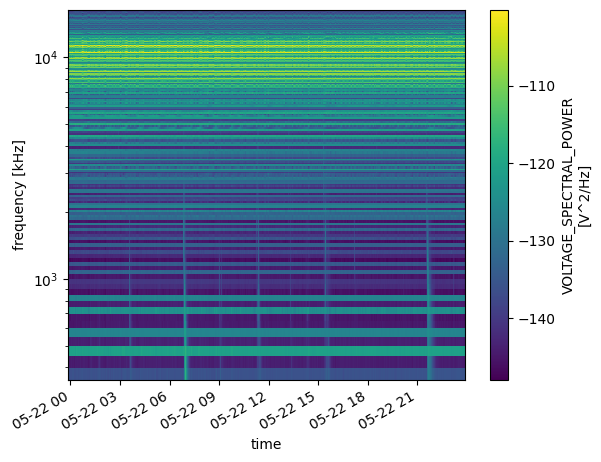

In [11]:
hfr_power.plot(yscale="log")

# Closer look at the data

Let's look at TNR data

In [59]:
import matplotlib.dates as mdates

In [60]:
print(np.shape(tnr_power.data))
print(np.shape(tnr_power.frequency))
print(np.shape(tnr_power.time))

(128, 6630)
(128,)
(6630,)


Choose a frequency channel that is not too noisy and plot the lightcurve

In [61]:
freq_channel = 117
radio_lightcurve = tnr_power.data[freq_channel,:]
freq = tnr_power.frequency[freq_channel]

In [62]:
str(freq.data) + ' ' + str(freq.units)

'634525.0 Hz'

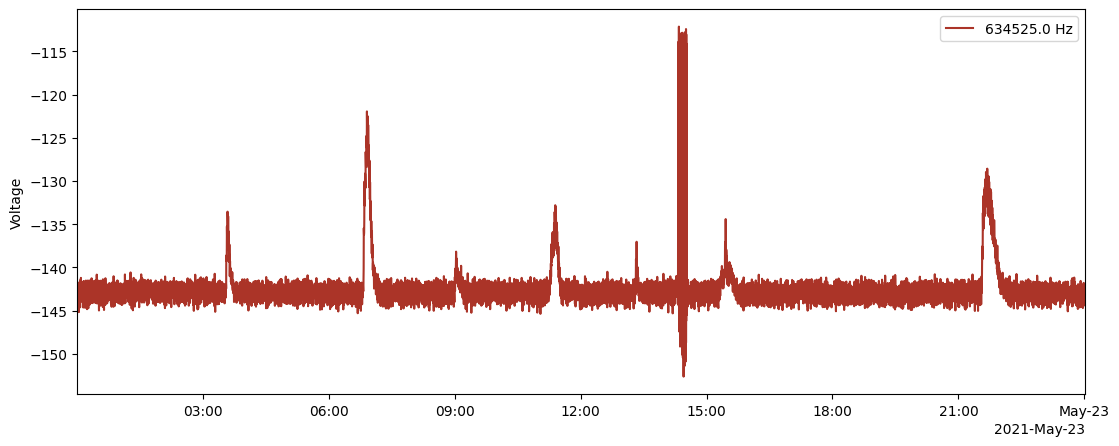

In [63]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_ylabel('Voltage')
locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim([tnr_power.time[0],tnr_power.time[-1]])  
ax.plot(tnr_power.time, radio_lightcurve, label=str(freq.data) + ' ' + str(freq.units), color='#ab3428')
ax.legend()
plt.show()

Look into some loose determination of the background level

In [64]:
# calculating mean, median, std on the whole day
mean = np.mean(radio_lightcurve)
median = np.median(radio_lightcurve)
std = np.std(radio_lightcurve)
# remove interval that are obviously not background. 
# This is really crude and in the selection there is still a fair amount of signal, but at lower level
# so the median and std calculated on this selection will be close to the median and std of the background
selection = radio_lightcurve[radio_lightcurve < (median+std)]
new_median = np.median(selection)
new_std = np.std(selection)

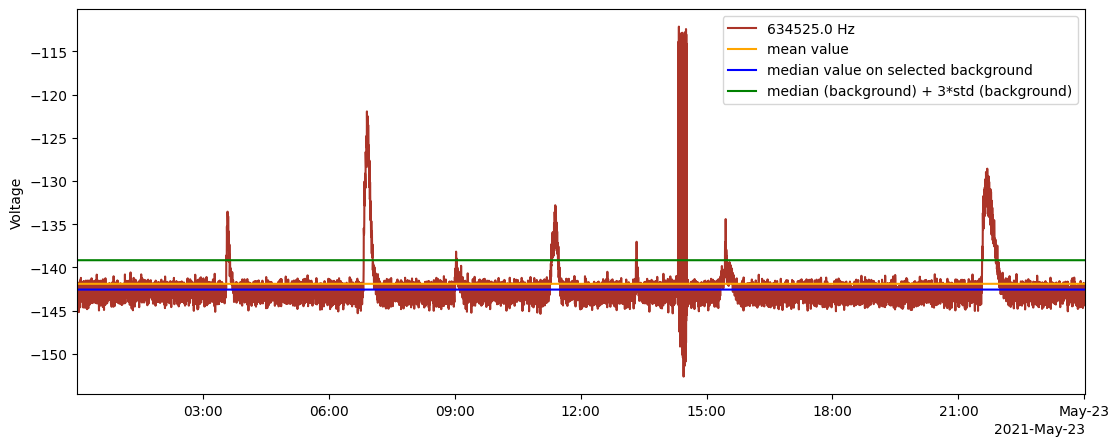

In [65]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_ylabel('Voltage')
locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim([tnr_power.time[0],tnr_power.time[-1]])  
ax.plot(tnr_power.time, radio_lightcurve, label=str(freq.data) + ' ' + str(freq.units), color='#ab3428')
ax.plot(tnr_power.time, radio_lightcurve*0+mean, label='mean value', color='orange')
ax.plot(tnr_power.time, radio_lightcurve*0+new_median, label='median value on selected background', color='blue')
# in here let's see if considering levels above 3 times the std is a good option
ax.plot(tnr_power.time, radio_lightcurve*0+new_median+3*new_std, label='median (background) + 3*std (background)', color='green')
ax.legend()
plt.show()

Let's continue with this detection rule and see the results on the plot

In [66]:
detection = radio_lightcurve > new_median+3*new_std

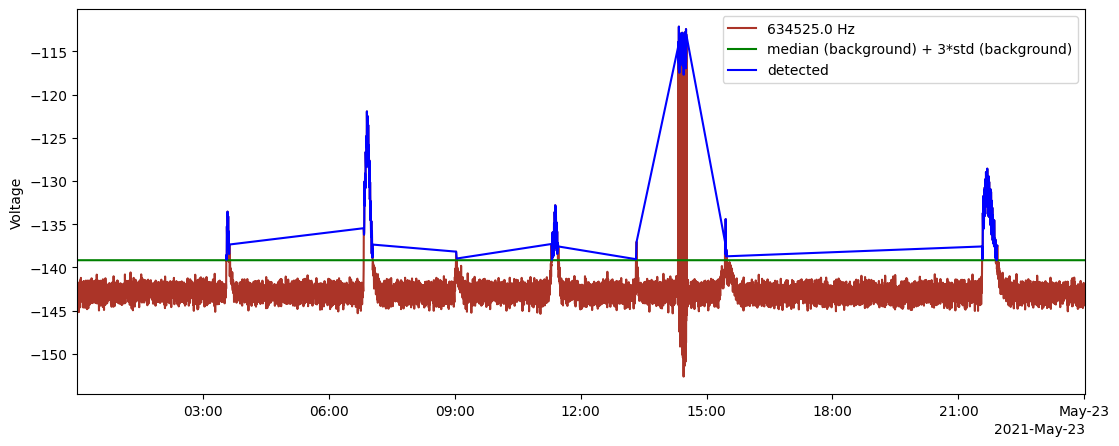

In [82]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_ylabel('Voltage')
locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim([tnr_power.time[0],tnr_power.time[-1]])  
ax.plot(tnr_power.time, radio_lightcurve, label=str(freq.data) + ' ' + str(freq.units), color='#ab3428')
# in here let's see if considering levels above 3 times the std is a good option
ax.plot(tnr_power.time, radio_lightcurve*0+new_median+3*new_std, label='median (background) + 3*std (background)', color='green')
ax.plot(tnr_power.time[detection], radio_lightcurve[detection], label='detected', color='blue')
ax.legend()
plt.show()

Now let's find intervals detected, and keep only the ones that have more than one data point above the threshold. The following code is probably dumb but it does the job - to be refined!

In [68]:
#det_boundaries = np.where(detection[:-1] != detection[1:])

In [83]:
### Finding start and end indices of intervals of detection
start = []
end = []
for i in range(1,len(detection)):
    if detection[i] == True and detection[i-1] == False:
        start.append(i)
    if detection[i] == True and detection [i+1] == False:
        end.append(i+1)
start_ind = np.array(start)
end_ind = np.array(end)

In [99]:
### selecting only the intervals that have more than one data point
detection_interval_start = start_ind[(end_ind-start_ind)>2]
detection_interval_end = end_ind[(end_ind-start_ind)>2]

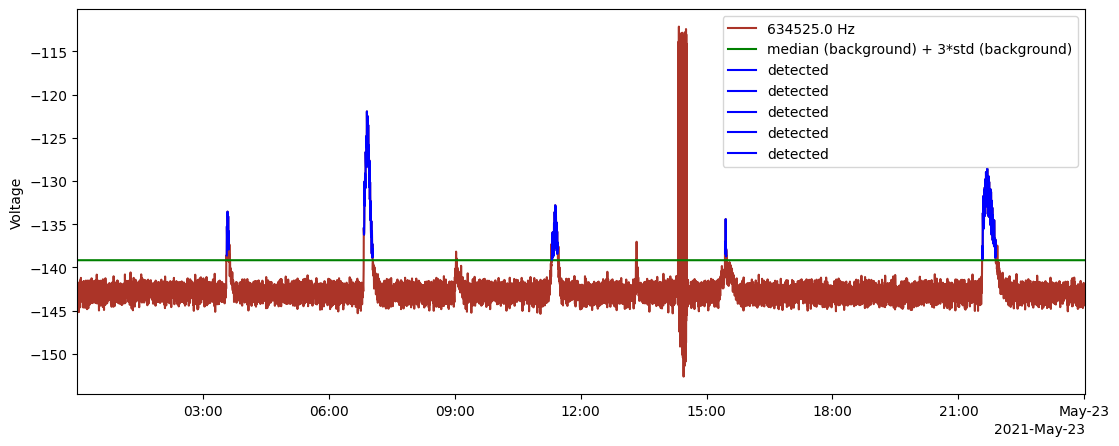

In [100]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_ylabel('Voltage')
locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim([tnr_power.time[0],tnr_power.time[-1]])  
ax.plot(tnr_power.time, radio_lightcurve, label=str(freq.data) + ' ' + str(freq.units), color='#ab3428')
ax.plot(tnr_power.time, radio_lightcurve*0+new_median+3*new_std, label='median (background) + 3*std (background)', color='green')
for i in range(len(detection_interval_start)):
    ax.plot(tnr_power.time[detection_interval_start[i]:detection_interval_end[i]], radio_lightcurve[detection_interval_start[i]:detection_interval_end[i]], label='detected', color='blue')
ax.legend()
plt.show()

Conclusion: we are missing very faint events but also removing detection of the bad data between 2-3pm, so not too bad!
Let's print the times of the start of each type III detected

In [101]:
for i in range(len(detection_interval_start)):
    print(str(tnr_power.time[detection_interval_start[i]].data))

2021-05-22T03:34:31.408942000
2021-05-22T06:50:18.205705000
2021-05-22T11:19:00.940020000
2021-05-22T15:26:28.469095000
2021-05-22T21:33:57.087984000


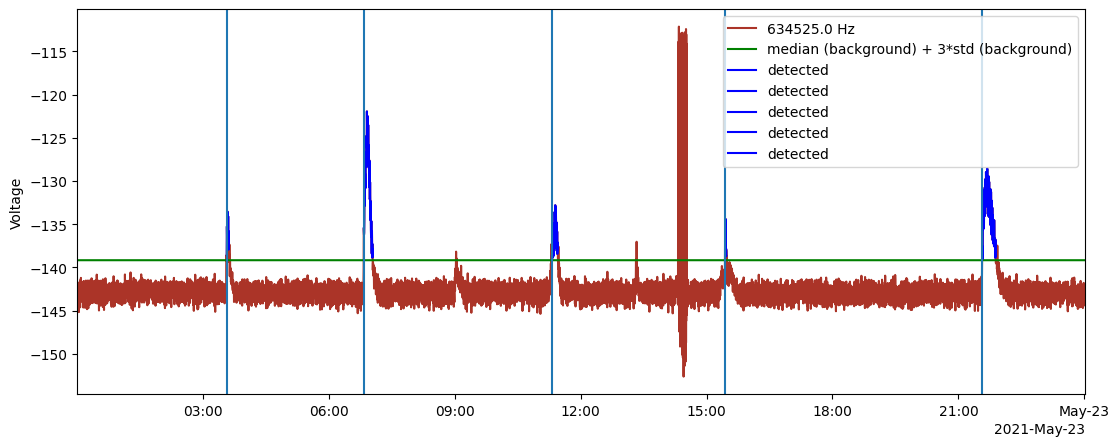

In [102]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_ylabel('Voltage')
locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim([tnr_power.time[0],tnr_power.time[-1]])  
ax.plot(tnr_power.time, radio_lightcurve, label=str(freq.data) + ' ' + str(freq.units), color='#ab3428')
ax.plot(tnr_power.time, radio_lightcurve*0+new_median+3*new_std, label='median (background) + 3*std (background)', color='green')
for i in range(len(detection_interval_start)):
    ax.plot(tnr_power.time[detection_interval_start[i]:detection_interval_end[i]], radio_lightcurve[detection_interval_start[i]:detection_interval_end[i]], label='detected', color='blue')
    ax.axvline(x = tnr_power.time[detection_interval_start[i]].data, color = 'tab:blue')

ax.legend()
plt.show()

# Frequencies to consider

The list of clean frequencies is available in Fig 10 of [Maksimovic et al (2021)](https://www.aanda.org/articles/aa/pdf/2021/12/aa41271-21.pdf) - to take with a grain of salt, because some more calibration and work has been done on the data since this publication, but this is a great starting point.    
I would start with the higher frequency channels in TNR, but that's only my own preference, you can explore both TNR and HFR.


# Test

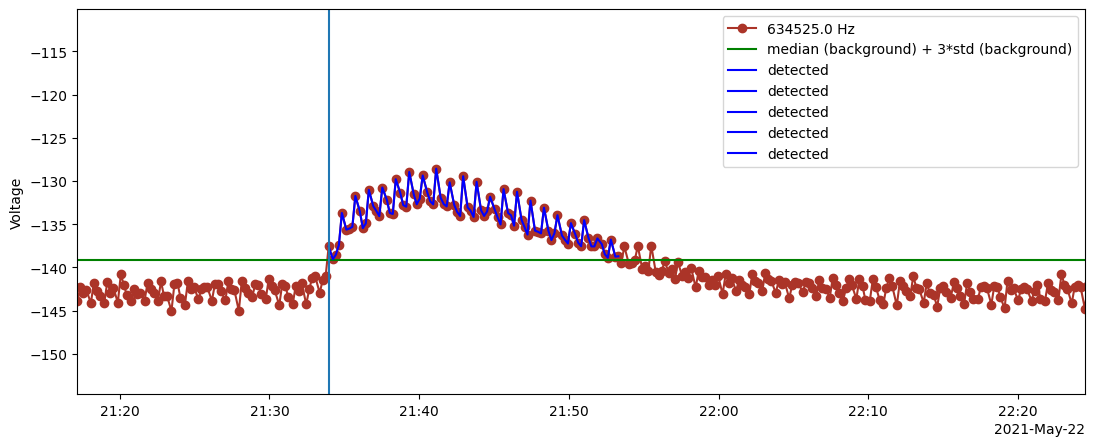

In [103]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_ylabel('Voltage')
locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim([tnr_power.time[5900],tnr_power.time[6200]])  
ax.plot(tnr_power.time, radio_lightcurve, marker = 'o',label=str(freq.data) + ' ' + str(freq.units), color='#ab3428')
ax.plot(tnr_power.time, radio_lightcurve*0+new_median+3*new_std, label='median (background) + 3*std (background)', color='green')
for i in range(len(detection_interval_start)):
    ax.plot(tnr_power.time[detection_interval_start[i]:detection_interval_end[i]], radio_lightcurve[detection_interval_start[i]:detection_interval_end[i]], label='detected', color='blue')
    ax.axvline(x = tnr_power.time[detection_interval_start[i]].data, color = 'tab:blue')

ax.legend()
plt.show()